# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

['./mySigns/img2.jpg', './mySigns/img2_crop.jpg', './mySigns/img0_crop.jpg', './mySigns/img1_crop.jpg', './mySigns/img4.jpg', './mySigns/img5.jpg', './mySigns/img0.jpg', './mySigns/img4_crop.jpg', './mySigns/img5_crop.jpg', './mySigns/img1.jpg', './mySigns/img3_crop.jpg', './mySigns/img3.jpg']


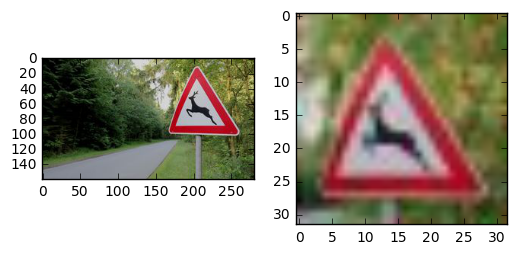

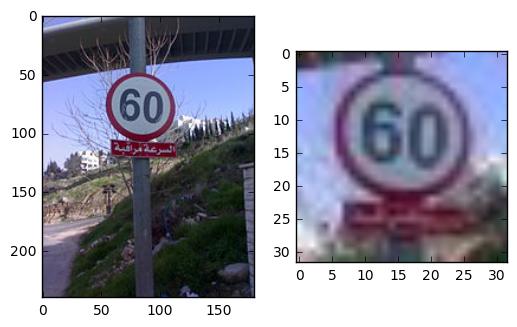

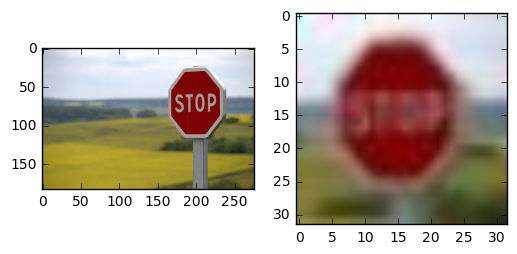

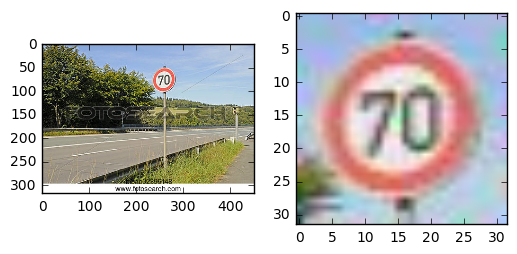

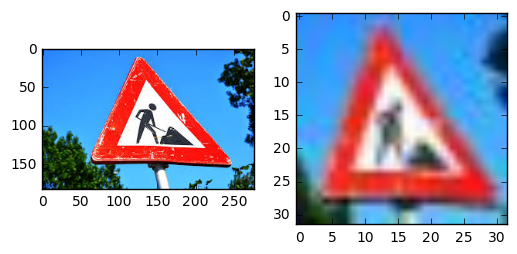

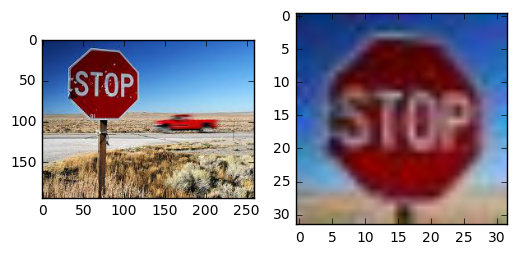

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
from scipy import misc
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline
nImages = 6
dirSigns = './mySigns/img'
X_MyTest = np.zeros([6,32,32,3])
print(glob.glob(dirSigns+'*'))
for iImg in range(0,nImages):
    dirImg = dirSigns+str(iImg) + '.jpg'
    dirImgCrop = dirSigns+str(iImg) + '_crop.jpg'
    img = cv2.cvtColor(cv2.imread(dirImg,1), cv2.COLOR_BGR2RGB)
    imgC = cv2.cvtColor(cv2.imread(dirImgCrop,1), cv2.COLOR_BGR2RGB)
    X_MyTest[iImg,:,:,:] = imgC
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.imshow(imgC)

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/home/repete/DataFolder/traffic-signs-data/train.p'
testing_file = '/home/repete/DataFolder/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_trainIn, y_trainIn = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print('TrainData shape: ',X_trainIn.shape, 'TrainLabel shape: ', y_trainIn.shape, '\n\rTestData shape: ', X_test.shape, 'TestLabel shape: ', y_test.shape)

TrainData shape:  (39209, 32, 32, 3) TrainLabel shape:  (39209,) 
TestData shape:  (12630, 32, 32, 3) TestLabel shape:  (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
import numpy as np
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_trainIn.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_trainIn.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_trainIn).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

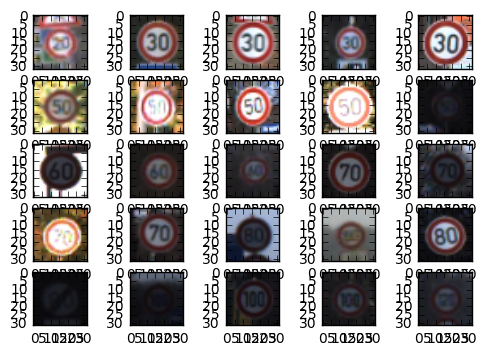

In [4]:
### Show some image examples.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

nRows = 5
nCols = 5
spacing = 500
plt.figure()
# Show image examples.
for iImg in range(0,nRows*nCols):
    plt.subplot(nRows,nCols,iImg+1)
    plt.imshow(X_trainIn[iImg*spacing,:,:,:])

(array([  60.,  720.,  750.,  450.,  660.,  630.,  150.,  450.,  450.,
         480.,  660.,  420.,  690.,  720.,  270.,  210.,  150.,  360.,
         390.,   60.,   90.,   90.,  120.,  150.,   90.,  480.,  180.,
          60.,  150.,   90.,  150.,  270.,   60.,  210.,  120.,  390.,
         120.,   60.,  690.,   90.,   90.,   60.,   90.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.13953488,  37.11627907,  38.09302326,
         39.06976

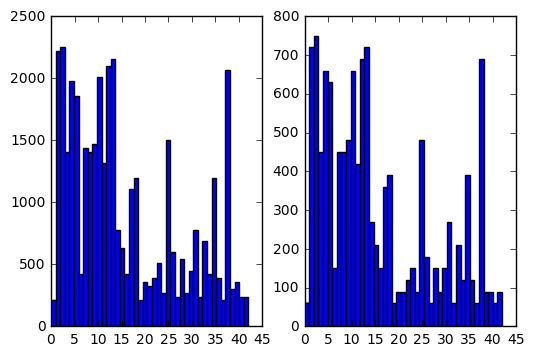

In [5]:
## Show histogram distribution of classes.
plt.figure()
plt.subplot(1,2,1)
plt.hist(y_trainIn,n_classes)
plt.subplot(1,2,2)
plt.hist(y_test,n_classes)

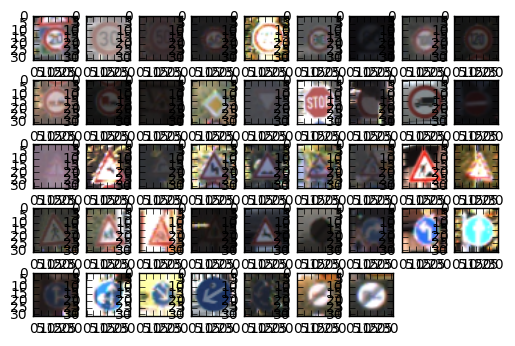

In [6]:
### Show all signs (only one per-class)
#X_trainIn
#y_trainIn

labels, indices = np.unique(y_trainIn, return_index=True)
spDim = [5,9]
plt.figure()
for label, index in zip(labels,indices):
    plt.subplot(spDim[0],spDim[1],label+1)
    plt.imshow(X_trainIn[index,:,:,:])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
### Preprocess the data here.
### Convert to float32 and normalize. 
def typecastNormalize(X,mu,sig):
    X = X.astype(np.float32)
    X = (X-mu)/sig
    return X

Xmean = np.mean(X_trainIn)
Xsig = np.sqrt(np.var(X_trainIn))

doNormalization = True
X_train = typecastNormalize(X_trainIn,Xmean,Xsig)
X_test = typecastNormalize(X_test,Xmean,Xsig)
y_train = y_trainIn

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer: ** The data is typecasted to float and normalized using mean and variance of the training data across all images and channels. A network is more easily optimized if the input data is normalized. Having too large or too small feature values may result in slow or no convergence of the model at all.

In [8]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
### Permute data
def permuteData(X,y):
    shuffleIdx = np.random.permutation(X.shape[0])
    return X[shuffleIdx], y[shuffleIdx]
X_train, y_train = permuteData(X_train, y_train)

pSplit = 0.8

y_train = y_train[0:int(X_train.shape[0]*pSplit)]
X_train = X_train[0:int(X_train.shape[0]*pSplit),:,:,:]
X_val = X_train[int(X_train.shape[0]*pSplit):int(X_train.shape[0]),:,:,:]
y_val = y_train[int(X_train.shape[0]*pSplit):int(X_train.shape[0])]
#print("All training samples: ",X_train.shape, "Labels: ", y_train.shape)
print("Training sample: " ,X_train.shape, "Labels: ", y_train.shape)
print("Validation samples: ",X_val.shape, "Labels: ", y_val.shape)

Training sample:  (31367, 32, 32, 3) Labels:  (31367,)
Validation samples:  (6274, 32, 32, 3) Labels:  (6274,)


Min -0.835239 max 1.67055
Min -0.867667 max 1.70858
Min -0.867667 max 1.70858
Min -0.867667 max 1.70858
Min -0.867667 max 1.70858
Min -0.867667 max 1.70858
Training sample:  (188202, 32, 32, 3) Labels:  (188202,)
Validation samples:  (6274, 32, 32, 3) Labels:  (6274,)


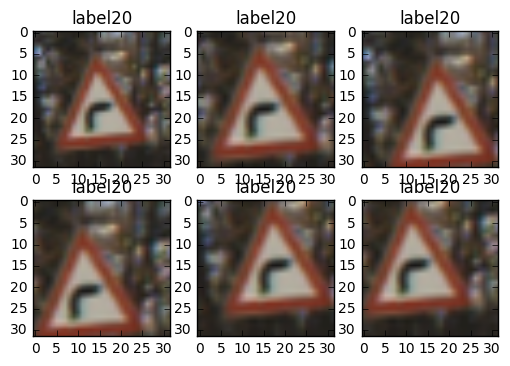

In [9]:
### WARNING this is very slow
import scipy.ndimage

### Scale and crop
plt.figure()
def scaleAnd5Crops(X,y,rmPixels):
    dimX = X.shape
    Xtmp = X
    ytmp = y
    resizeFactor = (dimX[1]+rmPixels*2)/dimX[1]
    Xscaled = scipy.ndimage.zoom(X, (1, resizeFactor, resizeFactor,1))
    startPostions = [[rmPixels,rmPixels],[0,0],[0,rmPixels*2],[rmPixels*2,0],[rmPixels*2,rmPixels*2]]
    #print(startPostions)
    for idx,startPostion in enumerate(startPostions): 
        xStart = startPostion[0]
        xEnd = startPostion[0]+dimX[1]
        yStart = startPostion[1]
        yEnd = startPostion[1]+dimX[2]
        Xtmp = np.concatenate((Xtmp, Xscaled[:,xStart:xEnd,yStart:yEnd,:]), axis=0)
        ytmp= np.concatenate((ytmp,y), axis=0)
        
    return Xtmp,ytmp

### Test and visualize function
remPixels = 3
inputImages = X_train[0:4,:,:,:]
inputLabels = y_train[0:4]
X,y = scaleAnd5Crops(inputImages,inputLabels,remPixels)
plt.figure()
for idx in range(0,6):
    img = X[idx*inputImages.shape[0],:,:,:]
    print("Min",np.min(img),"max",np.max(img))
    plt.subplot(2,3,idx+1)
    plt.imshow((img*Xsig+Xmean).astype(np.uint8))
    plt.title("label"+str(y[idx*inputImages.shape[0]]))

### Generate data
X_train,y_train = scaleAnd5Crops(X_train,y_train,remPixels)
print("Training sample: " ,X_train.shape, "Labels: ", y_train.shape)
print("Validation samples: ",X_val.shape, "Labels: ", y_val.shape)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** 
#### Splitting data
(I overlooked the already existing function for splitting data, so I ended up creating one myself). The originally provided data is already split into a test and a train set. To also create a validation set, the originally provided train data is shuffled and afterwards split into a train and validation set defined by the pSplit-variable. 80% of data is defined as train, and the remaining 20% is defined as validation set. 
#### Generating data
An input image is resized and cropped in to five 32x32 images. Subplot (0,0) shows the original input image of size 32x32. To allow image cropping without reducing the image size, the original image is slightly resized 36x36. Subplot (0,1),(0,2),(1,0), (1,1) and (0,2) shows 5 image crops with the size of 32x32. The crop and resizing augmentation is perform to be more scale and translational invarint.

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

#def convLayer(x,W,b, strides=1,paddingIn='SAME'):
#    return tf.nn.bias_add(tf.nn.conv2d(x,W,strides=[1,strides,strides,1],padding=paddingIn),b)

#def maxPool(x, k=2):
#    return tf.nn.max_pool(x, ksize=[1,k,k,1],strides=[1,k,k,1],padding='SAME')

#def fcLayer(x,W,b):
#    return tf.add(tf.matmul(x,W),b)

# nInputChannels can be determined automatically. 
def convLayer(x,nKernels,kernelSize=3, strides=1,paddingIn='SAME',printDim=False):
    mu = 0
    sigma = 0.1
    Wshape = [kernelSize,kernelSize,x.get_shape().as_list()[-1],nKernels]
    bshape = [nKernels]
    W = tf.Variable(tf.truncated_normal(Wshape, mean = mu, stddev = sigma))
    b = tf.Variable(tf.zeros(bshape))
    conv = tf.nn.conv2d(x,W,strides=[1,strides,strides,1],padding=paddingIn)
    out = tf.nn.bias_add(conv,b)
    if(printDim==True): 
        print("ConvLayer")
        print("\tinputDataShape: ",x.get_shape())
        print("\toutputDataShape: ",out.get_shape())
    return out

def maxPool(x, k=2,printDim=False):
    out = tf.nn.max_pool(x, ksize=[1,k,k,1],strides=[1,k,k,1],padding='SAME')
    if(printDim==True): 
        print("MaxPooling")
        print("\tinputDataShape: ",x.get_shape())
        print("\toutputDataShape: ",out.get_shape())
    
    return out

def fcLayer(x, nKernels,printDim=False):
    mu = 0
    sigma = 0.1
    Wshape = [x.get_shape().as_list()[-1],nKernels]
    bshape = [nKernels]
    W = tf.Variable(tf.truncated_normal(Wshape, mean = mu, stddev = sigma))
    b = tf.Variable(tf.zeros(bshape))
    out = tf.add(tf.matmul(x,W),b)
    if(printDim==True): 
        print("FullyConnected")
        print("\tinputDataShape: ",x.get_shape())
        print("\toutputDataShape: ",out.get_shape())
    return out


## Network parameters
nKernels = {
    'conv1' : 6,
    'conv2' : 16,
    'fc1' : 120,
    'fc2' : 84,
    'output' : n_classes,
}

kernelSize = {
    'conv1' : 5,
    'conv2' : 5
}

def LeNet(x,nKernels,kernelSize,printDim=False):
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    #conv1 = convLayer(x,W['conv1'],b['conv1'],paddingIn='VALID')
    conv1 = convLayer(x,nKernels['conv1'],kernelSize=kernelSize['conv1'],paddingIn='VALID',printDim=printDim)
    
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    pool1 = maxPool(conv1,k=2,printDim=printDim)
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    #conv2 = convLayer(pool1,W['conv2'],b['conv2'],paddingIn='VALID')
    conv2 = convLayer(pool1,nKernels['conv2'],kernelSize=kernelSize['conv2'],paddingIn='VALID',printDim=printDim)
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    pool2 = maxPool(conv2,printDim=printDim)

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    #fc1 = tf.reshape(pool2,[-1,W['fc1'].get_shape().as_list()[0]])
    fc1 = flatten(pool2)# Easier is to use the imported flatten function
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    #fc1 = fcLayer(fc1,W['fc1'],b['fc1'])
    fc1 = fcLayer(fc1, nKernels['fc1'],printDim=printDim)
        
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    #fc2 = fcLayer(fc1,W['fc2'],b['fc2'])
    fc2 = fcLayer(fc1, nKernels['fc2'],printDim=printDim)
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    #logits = fcLayer(fc2,W['output'],b['output'])
    logits = fcLayer(fc2, nKernels['output'],printDim=printDim)
    
    return logits

kernelSize2 = {
    'conv1' : 3,
    'conv2' : 3
}

def LeNet2(x,nKernels,kernelSize,printDim=False):
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_0 = tf.nn.relu(convLayer(x,nKernels['conv1'],kernelSize=kernelSize2['conv1'],paddingIn='VALID',printDim=printDim))
    conv1_1 = tf.nn.relu(convLayer(conv1_0,nKernels['conv1'],kernelSize=kernelSize2['conv1'],paddingIn='VALID',printDim=printDim))
    conv1_2 = tf.nn.relu(convLayer(conv1_1,nKernels['conv1'],kernelSize=kernelSize2['conv1'],paddingIn='SAME',printDim=printDim))
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    pool1 = maxPool(conv1_2,k=2,printDim=printDim)
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_0 = tf.nn.relu(convLayer(pool1,nKernels['conv2'],kernelSize=kernelSize2['conv2'],paddingIn='VALID',printDim=printDim))
    conv2_1 = tf.nn.relu(convLayer(conv2_0,nKernels['conv2'],kernelSize=kernelSize2['conv2'],paddingIn='VALID',printDim=printDim))
    conv2_2 = tf.nn.relu(convLayer(conv2_1,nKernels['conv2'],kernelSize=kernelSize2['conv2'],paddingIn='SAME',printDim=printDim))

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    pool2 = maxPool(conv2_2,printDim=printDim)

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    #fc1 = tf.reshape(pool2,[-1,W['fc1'].get_shape().as_list()[0]])
    fc1 = flatten(pool2)# Easier is to use the imported flatten function
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    #fc1 = fcLayer(fc1,W['fc1'],b['fc1'])
    fc1 = fcLayer(fc1, nKernels['fc1'],printDim=printDim)
        
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    #fc2 = fcLayer(fc1,W['fc2'],b['fc2'])
    fc2 = fcLayer(fc1, nKernels['fc2'],printDim=printDim)
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    #logits = fcLayer(fc2,W['output'],b['output'])
    logits = fcLayer(fc2, nKernels['output'],printDim=printDim)
    
    return logits

#### Input images and labels

In [11]:
# Create placeholders (input and labels)
x = tf.placeholder(tf.float32, (None, image_shape[0],image_shape[1],image_shape[2]))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
print('LenNet')
# Print network
test = LeNet(x,nKernels,kernelSize,printDim=True)

print('LenNet2')
# Print network
test = LeNet2(x,nKernels,kernelSize,printDim=True)

LenNet
ConvLayer
	inputDataShape:  (?, 32, 32, 3)
	outputDataShape:  (?, 28, 28, 6)
MaxPooling
	inputDataShape:  (?, 28, 28, 6)
	outputDataShape:  (?, 14, 14, 6)
ConvLayer
	inputDataShape:  (?, 14, 14, 6)
	outputDataShape:  (?, 10, 10, 16)
MaxPooling
	inputDataShape:  (?, 10, 10, 16)
	outputDataShape:  (?, 5, 5, 16)
FullyConnected
	inputDataShape:  (?, 400)
	outputDataShape:  (?, 120)
FullyConnected
	inputDataShape:  (?, 120)
	outputDataShape:  (?, 84)
FullyConnected
	inputDataShape:  (?, 84)
	outputDataShape:  (?, 43)
LenNet2
ConvLayer
	inputDataShape:  (?, 32, 32, 3)
	outputDataShape:  (?, 30, 30, 6)
ConvLayer
	inputDataShape:  (?, 30, 30, 6)
	outputDataShape:  (?, 28, 28, 6)
ConvLayer
	inputDataShape:  (?, 28, 28, 6)
	outputDataShape:  (?, 28, 28, 6)
MaxPooling
	inputDataShape:  (?, 28, 28, 6)
	outputDataShape:  (?, 14, 14, 6)
ConvLayer
	inputDataShape:  (?, 14, 14, 6)
	outputDataShape:  (?, 12, 12, 16)
ConvLayer
	inputDataShape:  (?, 12, 12, 16)
	outputDataShape:  (?, 10, 10, 16)
C

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** The LeNet architecture have been used. I have created a conv, fc and maxpooling layer-function that automatically creates weights and bias' for a given operation. Furthermore I have created LeNet2. In LeNet2, conv1 and conv2 (from LeNet) have been replaced with three 3x3 convolutions. The three convolutions use two valid-padding and one same-padding to maintain feature map output dimensions.


In [16]:
### Train your model here.
# Hyperparameters
save_file = './LeNetAll/model.ckpt'
learningRate = 0.001
batchsize = 128
epochs = 20
selectNetwork = 1

### Optimizer
if(selectNetwork==0):
    logits = LeNet(x,nKernels,kernelSize)
elif(selectNetwork==1):
    logits = LeNet2(x,nKernels,kernelSize)

# Cross-entropy using one-hot label encoding
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
# Loss is defined as the mean entropy accros all outputs and samples 
loss_operation = tf.reduce_mean(cross_entropy)
# An Adam Optimizer is used with a learning rate defined by the rate-variable
learning_rateIn = tf.placeholder(tf.float32)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rateIn)
training_operation = optimizer.minimize(loss_operation)


### Accuracy calculation
# The maximum value index of 'logits' and 'one_hot_y' is compared. Similar values will give a true response.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

# The correct_predictions are typecasted to float32 and the mean is determined. (This corresponds to the accuracy)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Evaluation: Splits data into batch
# An instance for saving the model is created.
saver = tf.train.Saver()

# Determines accuracy for data (X_data) with correspondings labels (y_data)
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batchsize):
        batch_x, batch_y = X_data[offset:offset+batchsize], y_data[offset:offset+batchsize]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [17]:
### Start training

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(epochs):
        
        # Data is shuffled for every epoch
        X_train, y_train = permuteData(X_train, y_train)
        
        for offset in range(0, num_examples, batchsize):
            # Grapping batches
            end = offset + batchsize
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            
            # Optimize model
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,learning_rateIn:learningRate})
        
        # Get validation_accuracy for every epoch
        validation_accuracy = evaluate(X_val, y_val)
        
        if(i==10):
            print("Learning rate have been reduced")
            learningRate = learningRate*0.1
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    
    test_accuracy = evaluate(X_test, y_test)
    print("Finally the obtain accuracy on the test set is = {:.3f}".format(test_accuracy))
    saver.save(sess, save_file)
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.893

EPOCH 2 ...
Validation Accuracy = 0.950

EPOCH 3 ...
Validation Accuracy = 0.974

EPOCH 4 ...
Validation Accuracy = 0.974

EPOCH 5 ...
Validation Accuracy = 0.973

EPOCH 6 ...
Validation Accuracy = 0.979

EPOCH 7 ...
Validation Accuracy = 0.987

EPOCH 8 ...
Validation Accuracy = 0.993

EPOCH 9 ...
Validation Accuracy = 0.992

EPOCH 10 ...
Validation Accuracy = 0.993

Learning rate have been reduced
EPOCH 11 ...
Validation Accuracy = 0.993

EPOCH 12 ...
Validation Accuracy = 0.999

EPOCH 13 ...
Validation Accuracy = 1.000

EPOCH 14 ...
Validation Accuracy = 1.000

EPOCH 15 ...
Validation Accuracy = 1.000

EPOCH 16 ...
Validation Accuracy = 1.000

EPOCH 17 ...
Validation Accuracy = 1.000

EPOCH 18 ...
Validation Accuracy = 1.000

EPOCH 19 ...
Validation Accuracy = 1.000

EPOCH 20 ...
Validation Accuracy = 1.000

Finally the obtain accuracy on the test set is = 0.951
Model saved


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** I have used the hyperparameters from the LeNet architecture solution (epochs=10, batchsize=128,rate=0.001). Similarly I have used the AdamOptimizer, bias' have been initialized as zeros, weights have been initialized with zero mean and a variance of sigma=0.1.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I have tried the following configurations:
- LeNet (Base): The traditional LeNet architecture from the solution is able to get an accuracy of 0.996 on the validation set and 0.918 on the test set.
- LeNet2 (Deeper): I have added additional depth by changing the conv layers traditionally used in LeNet (conv1 and conv2) with three 3x3 convolutional layers for each to increase the receptive field and the number of layers in the network. This haven't improved the network. The network obtained a similar accuracy of 0.995 on the validation set, but a slightly higher accuracy on the test set of 0.926. 
- LeNet (Reduce learning after 10 Epochs): I have also tried reducing the learning rate by 10 after 10 epochs. This helped improve accuracy to 1.000 of the validation set and 0.924 of the test set.
- LeNet (Data augmentation: resize/crop): Data augmentation by resizing and cropping out 32x32 regions creating 5 times more data. This didn't improve accuracy, even though the number of epoch was increased by 5 times (because an epoch is 5 times as big).
- LeNet (all): All tricks are used together... A bit unexpected this solution obtains the best solution on validation (1.0) and test (0.951)

The big gap between validation and test accuracy is probably caused by my function to split data into a train and a validation set. I will in the future use the test_train_split-function to divide the data into a train and a validation set.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [19]:
load_file = './LeNetAll/model.ckpt'
### Load trained model
#tf.reset_default_graph()
saver2 = tf.train.Saver()
with tf.Session() as sess:
    saver2.restore(sess, load_file)
    print("Min",np.min(X_MyTest),"Max",np.max(X_MyTest))
    inputData = typecastNormalize(X_MyTest,Xmean,Xsig)
    print("Min",np.min(inputData),"Max",np.max(inputData))
    output = sess.run(logits,feed_dict={x:inputData})
    labels = np.argmax(output,axis=1)
    print(labels)

Min 0.0 Max 255.0
Min -1.19735 Max 2.49615
[31  2 14  4 25 14]


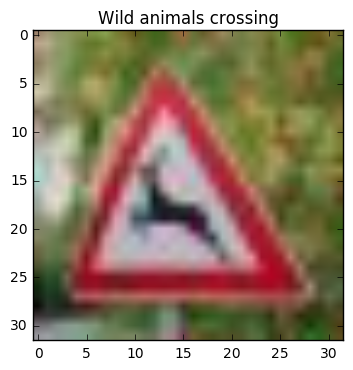

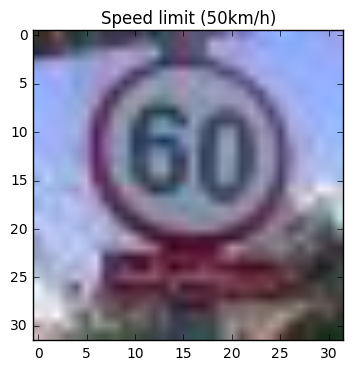

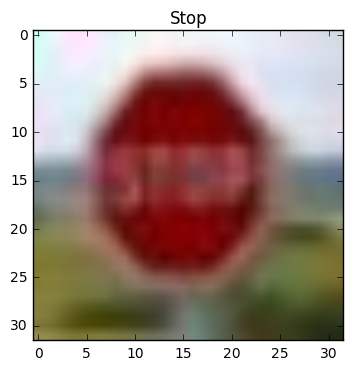

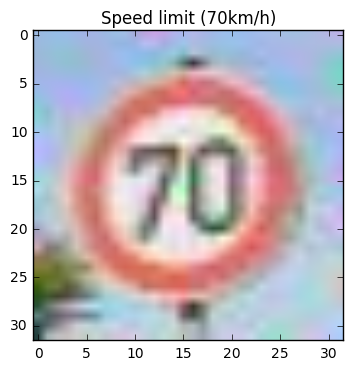

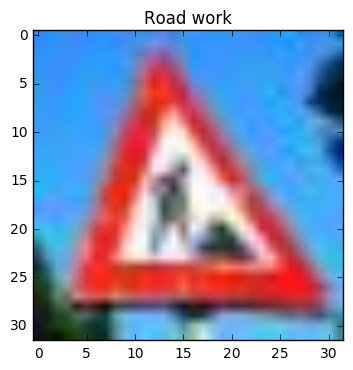

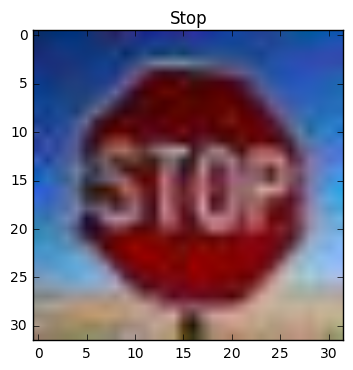

In [20]:
#from numpy import genfromtxt
import pandas as pd
#my_data = genfromtxt('signnames.csv', dtype="i,S5", delimiter=',',autostrip=True,skip_header=1)
my_data = pd.read_csv('signnames.csv')
for iImg in range(0,X_MyTest.shape[0]):
    
    #print("Min",np.min(X_MyTest[iImg,:,:,:]),"Max",np.max(X_MyTest[iImg,:,:,:]))
    plt.figure()
    
    plt.imshow(X_MyTest[iImg,:,:,:].astype(np.uint8))
    plt.title(my_data['SignName'][labels[iImg]])

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** The network gets 5 out of 6 answers correct. The misclassified sign is a "60 speed limit" with additional text written in some (to me unknown) language. I suspect that the text leads to a misclassification. I have used the LeNetAll configuration with extra depth, training and reduced learning. 

In [21]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** No. The accuracy is far less on the self-collected sign images with an accuracy of 83% (5 out of 6). In general a network is expected to perform worse on the test-set. Especially in this case, where non-german trafic signs have been used. However, determining the accuracy of a network using only 6 samples is (without doing any calculations) not statistically significantly.

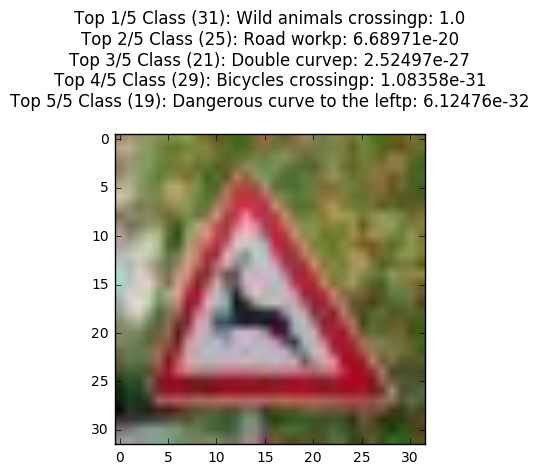

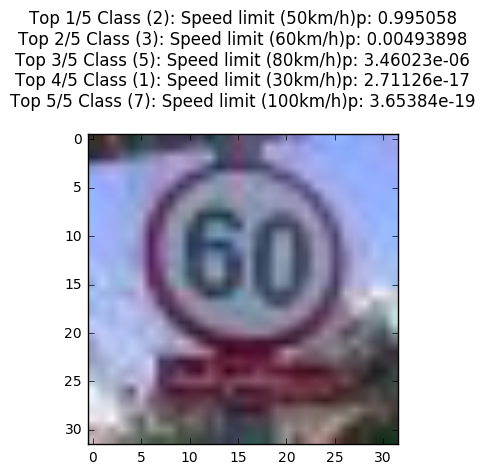

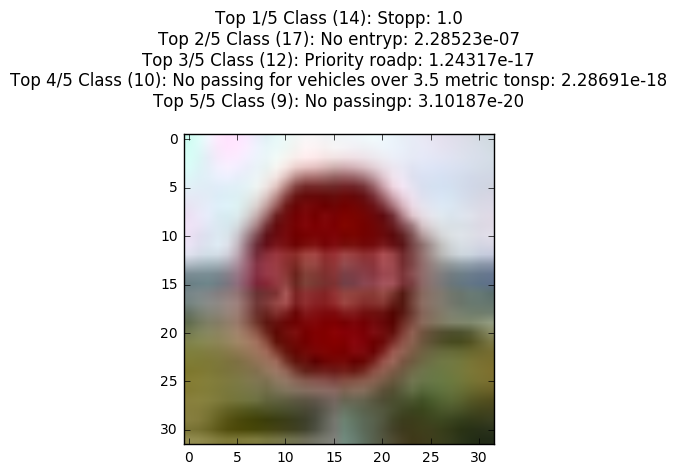

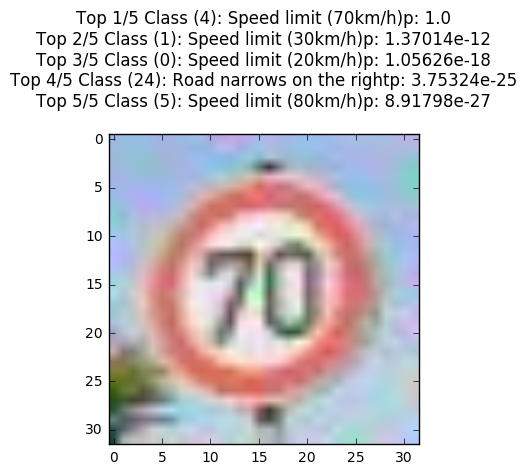

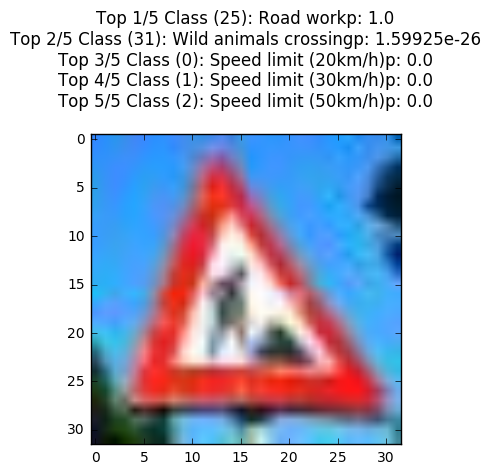

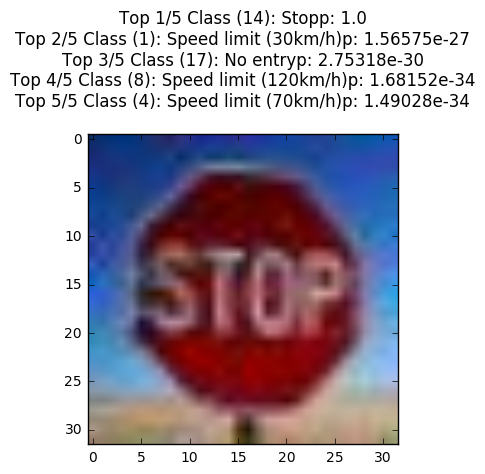

In [24]:
load_file = './LeNetAll/model.ckpt'
saver2 = tf.train.Saver()
with tf.Session() as sess:
    saver2.restore(sess, load_file)
    inputData = typecastNormalize(X_MyTest,Xmean,Xsig)
    top_k_values,top_k_classes = sess.run(tf.nn.top_k(tf.nn.softmax(logits),5),feed_dict={x:inputData})

    #labels = np.argmax(output,axis=1)

for iImg in range(0,X_MyTest.shape[0]):
    #print("Min",np.min(X_MyTest[iImg,:,:,:]),"Max",np.max(X_MyTest[iImg,:,:,:]))
    plt.figure()
    
    plt.imshow(X_MyTest[iImg,:,:,:].astype(np.uint8))
    tmpStr = ''
    for iTop in range(0,5):
        #print("Top ", str(iTop+1),"/", str(5), "Class (", str(top_k_classes[iImg][iTop]),"): ", my_data['SignName'][top_k_classes[iImg][iTop]], "p: ", str(top_k_values[iImg][iTop]))
        tmpStr = tmpStr + "Top " + str(iTop+1) + "/" + str(5) + " Class (" + str(top_k_classes[iImg][iTop]) + "): " + my_data['SignName'][top_k_classes[iImg][iTop]] + "p: " + str(top_k_values[iImg][iTop]) + "\n"
    plt.title(tmpStr)

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** Each image is presented with text showing class number, class name and softmax probability of the top-5 class predictions.
- Sign 1: Correct prediction of a "Animal crossing"-sign with a high probability of 1.0
- Sign 2: Wrong prediction of a "60 speed limit"-sign. The correct answer is listed as number two.
- Sign 3: Correct prediction of a "Stop"-sign with a high probability of 1.0
- Sign 4: Correct prediction of a "70 speed limit"-sign with a high probability of 1.0
- Sign 5: Correct prediction of a "Road work"-sign with a high probability of 1.0
- Sign 6: Correct prediction of a "Stop"-sign with a high probability of 1.0

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.